In [1]:
# Importamos librerias
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.metrics import accuracy_score




In [2]:

datos = pd.read_csv("wine.csv")
# Imprimimos vector
datos.head(28)



,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [3]:
#Medida vector
datos.shape


(178, 14)

In [4]:

#Describe las estadisticas
datos.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


(array([59.,  0.,  0.,  0.,  0., 71.,  0.,  0.,  0., 48.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

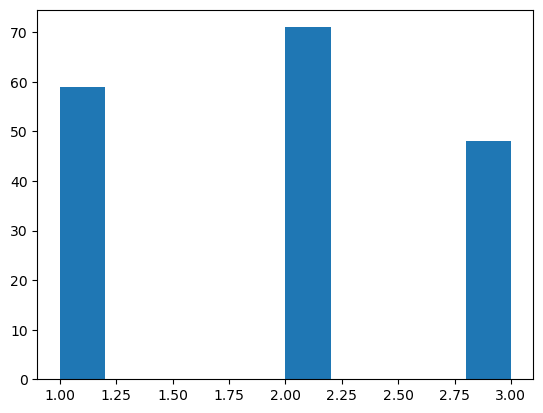

In [5]:
# Graficas 
plt.hist(datos.Class)

In [6]:
predictores = ["Alcohol","Malic acid","Ash","Alcalinity of ash","Magnesium","Total phenols","Flavanoids","Nonflavanoid phenols","Proanthocyanins","Color intensity","Hue","OD280/OD315 of diluted wines","Proline"]
target= ["Class"]
               

In [7]:
#dividimos en columnas
predictors = datos[predictores]
targets = datos[target]

In [8]:
#
x_train, x_test, y_train , y_test = train_test_split(predictors,targets,test_size=0.1, random_state=15)

In [9]:
tree=DecisionTreeClassifier()
arbol = tree.fit(x_train,y_train)

[Text(0.5, 0.9285714285714286, 'x[12] <= 755.0\ngini = 0.66\nsamples = 160\nvalue = [53, 63, 44]'),
 Text(0.25, 0.7857142857142857, 'x[11] <= 2.115\ngini = 0.495\nsamples = 100\nvalue = [2, 60, 38]'),
 Text(0.125, 0.6428571428571429, 'x[3] <= 17.25\ngini = 0.214\nsamples = 41\nvalue = [0, 5, 36]'),
 Text(0.0625, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0]'),
 Text(0.1875, 0.5, 'x[6] <= 1.58\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(0.125, 0.35714285714285715, 'gini = 0.0\nsamples = 36\nvalue = [0, 0, 36]'),
 Text(0.25, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.375, 0.6428571428571429, 'x[6] <= 0.795\ngini = 0.129\nsamples = 59\nvalue = [2, 55, 2]'),
 Text(0.3125, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.4375, 0.5, 'x[12] <= 726.5\ngini = 0.068\nsamples = 57\nvalue = [2, 55, 0]'),
 Text(0.375, 0.35714285714285715, 'x[0] <= 13.175\ngini = 0.035\nsamples = 56\nvalue = [1, 55, 0]'),
 Text(0.3125, 0.21428571428571427, 

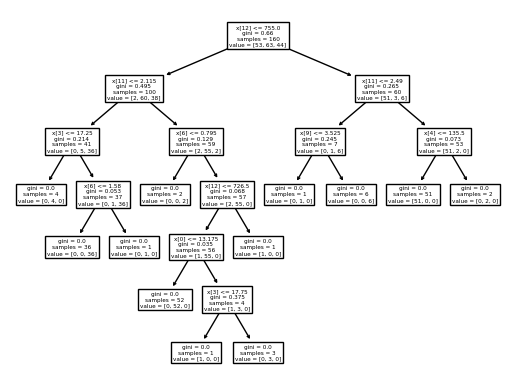

In [10]:
plot_tree(arbol)

In [11]:
predicciones = arbol.predict(x_test)

In [12]:
#examinamos matriz de confucion
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]),predicciones, rownames=["Actual"],colnames=["Prediccciones"])

Prediccciones,1,2,3
Actual,,,
1,6,0,0
2,2,5,1
3,0,0,4


In [13]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.8333333333333334